In [2]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
plt = matplotlib.pyplot

# Bias - Variance

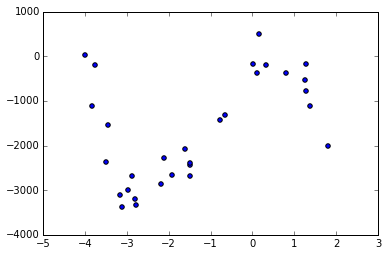

In [10]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2 * (5 * x) ** 3 - 30 * (5 * x) ** 2 + 100 * (10 * x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

## Simple example

In [3]:
# the physical law says: S = 1/2 * F / M * t*2
# S: displacement, M: mass, F: force
# Let's say we know nothing about physics
# Given this data measure points: 
# (t, S) for N points, we want to predict for (t_new) what is S_new

In [14]:
ground_truth_coef = 1./2 * 10 / 2
t = np.random.random(10) * 3
#ground_truth_result = ground_truth_coef * t**2
ground_truth_result = ground_truth_coef * t ** 2


# plus measure error
measure_result = ground_truth_result + np.random.randn(10)*2

# for prediction
t_new = np.random.random(5)
#print ground_truth_result
#print ground_truth_result2

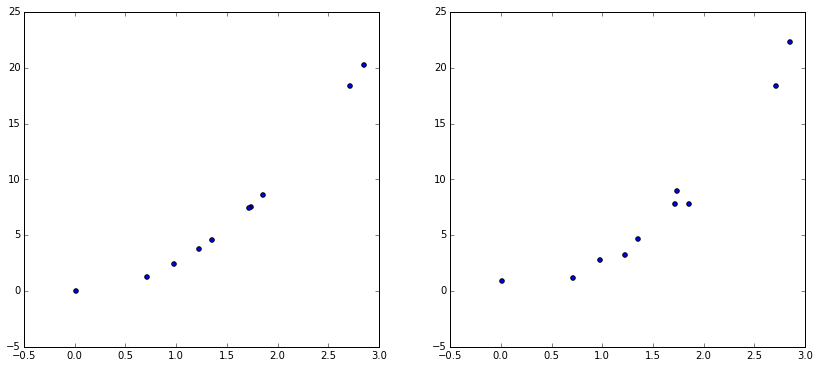

In [15]:
fig = plt.figure(figsize = (14, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(t, ground_truth_result)
# plt.scatter(t, ground_truth_result)

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(t, measure_result)
# plt.scatter(t, measure_result)


fig.show()

In [6]:
from sklearn import cross_validation, linear_model, metrics, datasets
lm_lr = linear_model.LinearRegression()

In [7]:
measure_result.shape

(10L,)

In [8]:
# Under fitting, what is the error? (using 1 order)
# we need to run it over multple times to see the difference
#np.random.seed(1)
N = 10000
error = []
#t = np.random.random(10) * 3
print type(t)
for i in range(N):
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2
    t.resize([len(t), 1])
    
    lm_lr.fit(t, measure_result)
    
    t_new = np.random.random(5)
    ground_truth_result_new = ground_truth_coef * t_new**2
    t_new.resize([len(t_new), 1])
    y_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(ground_truth_result_new, y_pred))
    
#print type(t)
error = np.array(error)

<type 'numpy.ndarray'>


In [9]:
print error.mean(), error.std()

5.78995362821 8.78613127825


In [10]:
# run some test on random function
#np.random.seed(100)
print np.random.randn(1)
print np.random.randn(1)
print np.random.randn(1)


[-0.37312076]
[ 1.03556321]
[-0.55266879]


In [11]:
# Over fitting? what is the error? (using 2 order)
np.random.seed(111)
N = 10000
error = []
for i in range(N):
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2
    t.resize([len(t), 1])
    t = np.hstack((t, t**2))
    #t = np.hstack([t, t**2])

    lm_lr.fit(t, measure_result)
    
    t_new = np.random.random(5)
    ground_truth_result_new = ground_truth_coef * t_new**2
    t_new.resize([len(t_new), 1])
    t_new = np.hstack([t_new, t_new**2])
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(ground_truth_result_new, t_pred))
print type(t) 
error = np.array(error)

<type 'numpy.ndarray'>


In [12]:
print error.mean(), error.std()
# 3.260106281 15.2933797734

3.260106281 15.2933797734


In [13]:
# Over fitting? what is the error? (using 3 order)
N = 10000
error = []
for i in range(N):
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2
    t.resize([len(t), 1])
    t = np.hstack([t, t**2, t**3])
    
    lm_lr.fit(t, measure_result)
    
    t_new = np.random.random(5)
    ground_truth_result_new = ground_truth_coef * t_new**2
    t_new.resize([len(t_new), 1])
    t_new = np.hstack([t_new, t_new**2, t_new**3])
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(ground_truth_result_new, t_pred))
#print type(t)    
error = np.array(error)

In [14]:
print error.mean(), error.std()

54.8581481614 1560.13803271


## Bias - Variance: model complexity

In [15]:
np.random.seed(1)
# x = np.linspace(-15,25,41)
# y = 2*x**3 - 30 * x **2 + 100*x + 1500 * np.random.randn(len(x))
x = np.linspace(0, 6.14, 101)
y = np.sin(x) + 0.3*np.random.randn(len(x))

X = []
t_score = []
v_score = []
for i in range(1,15):
    if i == 1:
        X.append(x.reshape(len(x), 1))
    else:
        X.append(np.hstack([X[-1], x.reshape(len(x), 1) ** i]))
    
    t_score.append([])
    v_score.append([])
    #for j in range(1000):
    for j in range(10):

        x_train, x_test, y_train, y_test = cross_validation.train_test_split(
            X[-1], y, test_size=0.2, random_state=j)
        rlm = linear_model.LinearRegression()
        rlm.fit(x_train, y_train)
        #print rlm.coef_, rlm.intercept_
        t_score[-1].append(metrics.mean_squared_error(y_train, rlm.predict(x_train)))
        v_score[-1].append(metrics.mean_squared_error(y_test, rlm.predict(x_test)))



In [16]:
t_score = np.array(t_score)
v_score = np.array(v_score)

In [17]:
t_score

array([[ 0.2311243 ,  0.25575559,  0.22616385,  0.26122905,  0.23503298,
         0.25008365,  0.2446604 ,  0.26267689,  0.23282141,  0.2251843 ],
       [ 0.22812442,  0.24233511,  0.22448447,  0.24068734,  0.23296086,
         0.24329707,  0.23689855,  0.25754112,  0.23087157,  0.22243484],
       [ 0.07549957,  0.08047117,  0.07478305,  0.07854107,  0.07303701,
         0.07708626,  0.07127216,  0.07490118,  0.07694778,  0.06771703],
       [ 0.07485351,  0.07892477,  0.07369239,  0.07736983,  0.07221923,
         0.07649207,  0.07126806,  0.07481817,  0.07449074,  0.06676924],
       [ 0.06936871,  0.07453102,  0.07080746,  0.06958499,  0.06586697,
         0.07186169,  0.06949615,  0.07183504,  0.07170558,  0.05983677],
       [ 0.06920279,  0.07452592,  0.06940091,  0.06921388,  0.06586688,
         0.07179073,  0.0678354 ,  0.07067107,  0.07155698,  0.05983465],
       [ 0.06823315,  0.0735318 ,  0.06938106,  0.06701508,  0.06416159,
         0.07006278,  0.06705267,  0.06933888

In [ ]:
size(t_score)

In [18]:
# Q1. Under ALL circumstances, is it that the more complicated a model is, the lower training error? 
# Q2. Under ALL circumstances, is it that the more complicated a model is, the lower testing error? 
# Q3. How does standard deviation looks like for both training & testing errors

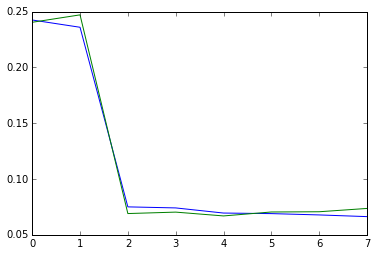

In [19]:
plt.plot(t_score.mean(axis=1)[:-6])
plt.plot(v_score.mean(axis=1)[:-6])

In [20]:
np.std(t_score), np.std(v_score)

(0.060639900614089463, 0.063317353881434488)

In [21]:
# under fit vs over fit
# In home work: model complexity
# Here: data points

## Bias - Variance: data size

In [22]:
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=2, noise=100)
X = data[0]
Y = data[1]
print X.shape, Y.shape

(1000L, 100L) (1000L,)


In [23]:
ts_range = np.arange(0.05, 1, 0.05)
N_run = 50
t_score = []
v_score = []
for train_s in ts_range:
    t_score.append([])
    v_score.append([])
    for iseed in range(N_run):
        X1, X2, Y1, Y2 = cross_validation.train_test_split(X, Y, train_size=train_s, random_state=iseed)
        rlm = linear_model.LinearRegression()
        rlm.fit(X1, Y1)
        t_score[-1].append(metrics.r2_score(Y1, rlm.predict(X1)))
        v_score[-1].append(metrics.r2_score(Y2, rlm.predict(X2)))
    # print train_s

In [24]:
t_score = np.array(t_score)
v_score = np.array(v_score)

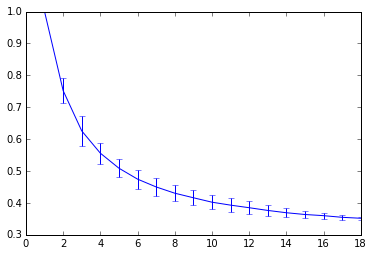

In [25]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])
y = t_score.mean(axis=1)
s = t_score.std(axis=1)
ax.errorbar(x, y, yerr=s)
fig.show()

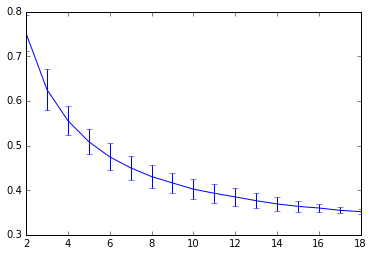

In [26]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
fig.show()

In [27]:
# Run massive example
# large feature, small dataset
# small feature, large dataset
# Q. do we need to get more data? 

In [28]:
# Exercise: package the above two code into functions, and then try use n_inform=2 and point=10000
# explore the training score & validation score relationship

In [29]:
#t_score, v_score = run_example(1000, 2, error=10)
#plot_result(t_score,0)

In [30]:
from sklearn import learning_curve

In [31]:
learning_curve.learning_curve?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve

In [ ]:
%%timeit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

# plt.show()

In [ ]:
%%timeit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=1)

# plt.show()

In [ ]:
# Exercise: try different datasets, and understand how the bias & variance works

# Regression in-depth

## Ridge

In [ ]:
1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

In [ ]:
np.arange(0, 10)[:, np.newaxis]

In [ ]:
np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis]

In [ ]:
np.logspace(5,-1,5)

In [ ]:
np.power(10,3.5)

In [ ]:
# X is the 10x10 Hilbert matrix
# X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y = np.ones(10)
data = datasets.make_regression(n_samples=1000, n_features=30, n_informative=15, random_state=0)

X = data[0]
y = data[1]

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(5, -1,n_alphas)
clf = linear_model.Ridge()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
clf.score?

## Lasso

In [ ]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Lasso()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_friedman1(random_state=0)
X = data[0]
y = data[1]

## Elastic Net

In [ ]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.ElasticNet(l1_ratio=0.5)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Grid Search

In [ ]:
from sklearn import grid_search

In [ ]:
np.logspace(-5, 5, 10)

In [ ]:
lrg = linear_model.Lasso()
the_dict = {'alpha': np.logspace(-5, 5, 20)}
gs_lrg = grid_search.GridSearchCV(lrg, the_dict, cv=5)

In [ ]:
gs_lrg.fit(X, y)

In [ ]:
# Excercise
# Q1. what is the best parametr of linear regression for friedman1 datasets for Lasso and Ridge?
#     visualize how the coeficient changes along with parameters

# Hint: 
# 1. explore the available results (XX_) after .fit method runs
# 2. explore the type and available attributes for the available results


# Q2. How about elastic net?

## SGD

In [ ]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_regression(n_samples=10000, n_features=1000, n_informative=1000)
X = data[0]
y = data[1]

In [ ]:
lrg = linear_model.LinearRegression()

In [ ]:
%%time
lrg1 = linear_model.LinearRegression()
lrg1.fit(X, y)

In [ ]:
a = lrg1.coef_

In [ ]:
%%time
lrg2 = linear_model.SGDRegressor()
lrg2.fit(X,y)

In [ ]:
b = lrg2.coef_

In [ ]:
linear_model.SGDRegressor?

## Preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.PolynomialFeatures?

In [ ]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))

In [ ]:
pp_pf = preprocessing.PolynomialFeatures(degree=5)

In [ ]:
pp_pf.fit_transform(x.reshape(30,1)).shape

In [ ]:
datasets.load_boston?

In [ ]:
# Exercise: re-write the homework using the preprocessing module in Sklearn, do the work
# explore the bias & varience

# Classification Metrics

In [ ]:
from sklearn import metrics

In [ ]:
# accuracy_score, precision_score, recall_score, f1_score, 
# confusion_matrix, classification_report

## confusion matrix

In [ ]:
y_true = [1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2]
y_pred = [1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2]
# metrics.confusion_matrix(y_true, y_pred)

In [ ]:
#print metrics.accuracy_score(y_true, y_pred)
#print metrics.precision_score(y_true, y_pred)
#print metrics.recall_score(y_true, y_pred)

In [ ]:
plt.imshow(metrics.confusion_matrix(y_true, y_pred), interpolation='nearest')

## ROC curve

In [ ]:
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6] # problistic results
y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction

In [ ]:
# How ROC curvie is calculated?
# 0.9
y_true = [0, 1, 0, 1, 1, 1, 0, 0]
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6]
y_pred = [0, 0, 0, 0, 0, 1, 0, 0]
print metrics.confusion_matrix(y_true, y_pred)
print metrics.recall_score(y_true, y_pred, pos_label=1), metrics.recall_score(y_true, y_pred,  pos_label=0)

In [ ]:
data = metrics.roc_curve(y_true, y_score)
data

In [ ]:
plt.plot(data[0], data[1], '*-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

In [ ]:
# create advanced learning algorithm & comparison
y_true = np.random.randint(0, 2, 100)
y_score = np.random.rand(100)

data = metrics.roc_curve(y_true, y_score)
plt.plot(data[0], data[1], '*-')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

In [ ]:
# Exercise: Can you design an advanced learning algorithm, and then run ROC over it?

In [ ]:
metrics.roc_auc_score(y_true, y_score)

In [ ]:
print metrics.classification_report(y_true, y_pred)

# Classification Methods

## Logistic regression

In [ ]:
from sklearn import linear_model

In [ ]:
logrg = linear_model.LogisticRegression()

In [ ]:
# load iris data
# construct logistic regression

In [ ]:
# Excercise: visualize the confusion matrix & ROC curve (for each class respectively)

## Visualizing decision boundary

In [ ]:
x_min = -1.8
x_max = 7.2
y_min = -1.8
y_max = 7.2
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lrg.predict(np.array(zip(xx.ravel(), yy.ravel())))

# reshape, contourf

## Decision tree

In [ ]:
from sklearn import tree

In [ ]:
tree.

## SVM

In [ ]:
from sklearn import svm

In [ ]:
svm.LinearSVC?

In [ ]:
# Exercise: compare the performance for decision tree, SVM, and logistic regression over IRIS data